<a href="https://colab.research.google.com/github/iamsommyajain/Bank-Churn-Prediction/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download barelydedicated/bank-customer-churn-modeling

Dataset URL: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling
License(s): CC0-1.0
bank-customer-churn-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bank-customer-churn-modeling.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
bank_df=pd.read_csv('/content/Churn_Modelling.csv')
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [ ]:
bank_df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
bank_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
bank_df.replace({'Female':1,'Male':0}, inplace = True)

In [ ]:
bank_df.Gender.unique()

array([1, 0])

In [ ]:
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
bank_df=pd.get_dummies(data=bank_df, columns=['Geography']).astype(int)

In [ ]:
bank_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,101348,1,1,0,0
1,608,1,41,1,83807,1,0,1,112542,0,0,0,1
2,502,1,42,8,159660,3,1,0,113931,1,1,0,0
3,699,1,39,1,0,2,0,0,93826,0,1,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,0,1


In [ ]:
bank_df.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,int64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,int64
Exited,int64


In [ ]:
X = bank_df.drop(columns = ['Exited'])
y = bank_df['Exited']

In [ ]:
X.shape, y.shape

((10000, 12), (10000,))

In [ ]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [ ]:
bank_df.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
y.value_counts()

,count
Exited,
1,7963
0,7963


In [ ]:
scaler=MinMaxScaler()
X[:] = scaler.fit_transform(X[:])

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12740, 12), (3186, 12), (12740,), (3186,))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(12,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=450)

Epoch 1/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7507 - loss: 0.5088
Epoch 2/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8183 - loss: 0.3883
Epoch 3/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8356 - loss: 0.3625
Epoch 4/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8412 - loss: 0.3436
Epoch 5/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8499 - loss: 0.3341
Epoch 6/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.3301
Epoch 7/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8531 - loss: 0.3273
Epoch 8/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3309
Epoch 9/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3250
Epoch 10/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3211
Epoch 11/450
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8605 - loss: 0.3153
Epoch 12/450
399/399 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy:{accuracy*100}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8328 - loss: 1.7192
Accuracy:83.77275466918945


In [ ]:
pred = model.predict(X_test)>0.5
binary_pred=(pred>0.5).astype(int)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
y_test[10:15]

,Exited
2323,0
8663,0
2099,0
12267,1
4995,0


In [ ]:
binary_pred[10:15]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1633
           1       0.81      0.87      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



<Axes: >

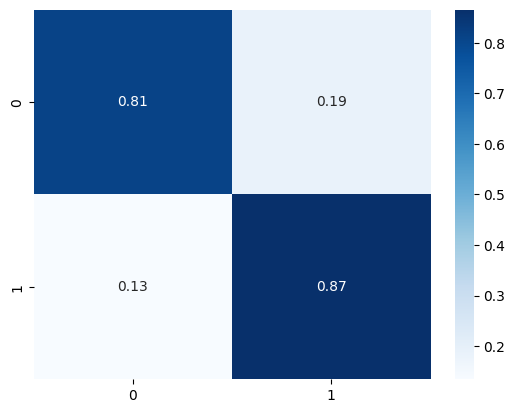

In [67]:
cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf,cmap = 'Blues', annot = True)